# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, log_loss,classification_report
import warnings
warnings.filterwarnings("ignore")

# Preparing Data

## Import the Train and Test Datasets into the Noteboook

In [2]:
train_df= pd.read_csv("train_dataset.csv")
test_df= pd.read_csv("test_dataset.csv")

The train dataset provides information about geospatial variables that could influence land cover classification. The test dataset contains unlabeled data.

## Inspect the Data

This step involves inspecting the data and ensuring we have the right data for modeling

In [3]:
train_df.shape

(15856, 49)

The train dataset has 15856 rows and 49 columns.

In [4]:
test_df.shape

(35, 46)

The test dataset has 35 rows and 46 columns

In [5]:
train_df.head()

,subid,lat,lon,building,cropland,wcover,bcount,x,y,bd20,...,mlon,nppm,npps,ph20,sirm,sirs,slope,snd20,soc20,tim
0,1548937,7.387687,-4.780390,No,No,>60%,0.0,-2.714375e+06,321874.969864,1.4900,...,-4.781606,5052.299805,853.451416,6.100,0.717054,0.008259,0.729217,66.75,12.25,8.079082
1,1548936,8.690266,-5.770243,No,Yes,<30%,0.0,-2.812625e+06,474124.973063,1.2925,...,-5.771476,5316.700195,933.074402,5.575,0.717198,0.007242,1.086981,51.50,14.25,9.549431
2,1548935,8.518763,-2.808147,No,Yes,<30%,0.0,-2.495125e+06,440374.986977,1.3050,...,-2.809363,4519.700195,1186.817627,5.850,0.717171,0.006744,1.159993,47.00,14.50,10.523131
3,1548934,8.637725,-3.048867,No,No,<30%,0.0,-2.520375e+06,454875.008083,1.3275,...,-3.050085,3439.800049,910.979309,5.950,0.718244,0.007917,2.471163,62.75,12.75,9.305363
4,1548933,7.993474,-6.044227,No,No,<30%,0.0,-2.846625e+06,396624.944149,1.4200,...,-6.045455,5226.899902,802.602661,5.800,0.716653,0.007022,0.259416,55.00,13.25,15.732859


In [6]:
test_df.head()

,subid,lat,lon,bcount,x,y,bd20,bio1,bio12,bio7,...,mlon,nppm,npps,ph20,sirm,sirs,slope,snd20,soc20,tim
0,1548905,4.824505,-7.522892,NaN,-3.023125e+06,44125.021587,1.4075,250,2564,46,...,-7.524098,12909.700195,870.217346,5.025,0.719068,0.007398,4.093175,64.50,23.50,9.168183
1,1548829,5.457730,-5.010404,NaN,-2.749125e+06,104624.973824,1.6350,261,1378,71,...,-5.011604,12288.299805,839.143616,4.850,0.724049,0.007270,0.487844,65.75,13.00,7.896024
2,1548811,5.081743,-7.148626,NaN,-2.981625e+06,71625.015246,1.5825,247,1704,46,...,-7.149833,13374.500000,763.726135,5.100,0.720274,0.006467,2.113945,52.00,23.25,7.606022
3,1548806,5.673164,-4.171414,NaN,-2.657375e+06,125374.968207,1.7350,261,1700,68,...,-4.172613,11717.200195,814.182434,5.125,0.724026,0.007111,0.962922,59.75,15.00,8.471351
4,1548798,4.665885,-7.040600,NaN,-2.971875e+06,23875.013622,1.5925,259,1724,61,...,-7.041802,3474.800049,1809.494385,4.950,0.716632,0.007030,0.779259,70.50,15.75,13.725027


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15856 entries, 0 to 15855
Data columns (total 49 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   subid     15856 non-null  int64  
 1   lat       15856 non-null  float64
 2   lon       15856 non-null  float64
 3   building  15856 non-null  object 
 4   cropland  15856 non-null  object 
 5   wcover    15856 non-null  object 
 6   bcount    15856 non-null  float64
 7   x         15856 non-null  float64
 8   y         15856 non-null  float64
 9   bd20      15811 non-null  float64
 10  bio1      15856 non-null  int64  
 11  bio12     15856 non-null  int64  
 12  bio7      15856 non-null  int64  
 13  bio15     15856 non-null  int64  
 14  cec20     15811 non-null  float64
 15  dipa      15856 non-null  float64
 16  dni       15856 non-null  float64
 17  dnlt      15856 non-null  float64
 18  dnpa      15856 non-null  float64
 19  dor1      15856 non-null  float64
 20  dor2      15856 non-null  fl

In [8]:
train_df.describe()

,subid,lat,lon,bcount,x,y,bd20,bio1,bio12,bio7,...,mlon,nppm,npps,ph20,sirm,sirs,slope,snd20,soc20,tim
count,1.585600e+04,15856.000000,15856.000000,15856.000000,1.585600e+04,15856.000000,15811.000000,15856.000000,15856.000000,15856.000000,...,15856.000000,15856.000000,15856.000000,15811.000000,15856.000000,15856.000000,15856.000000,15811.000000,15811.000000,15855.000000
mean,1.540573e+06,7.639857,-5.557888,1.922931,-2.795617e+06,354332.207688,1.436390,258.906723,1276.893983,65.909183,...,-5.559110,5808.133261,1008.710241,5.611881,0.713705,0.007295,1.509903,55.166245,17.002324,10.336672
std,4.805508e+03,1.476289,1.500323,13.942902,1.613072e+05,167481.073066,0.163676,6.578450,253.890839,13.210307,...,1.500330,3292.222478,318.196819,0.344171,0.066204,0.000907,1.612766,7.287898,5.461648,1.748071
min,1.532219e+06,4.384086,-8.583182,0.000000,-3.128125e+06,-6374.979609,1.057500,198.000000,802.000000,43.000000,...,-8.584408,0.000000,0.000000,4.600000,0.000000,0.000000,0.000000,32.000000,5.000000,5.553461
25%,1.536478e+06,6.425833,-6.827483,0.000000,-2.932875e+06,217374.997331,1.287500,255.000000,1096.000000,57.000000,...,-6.828711,3387.450012,776.075455,5.400000,0.717612,0.006968,0.773976,49.750000,13.500000,9.067727
50%,1.540446e+06,7.680448,-5.652635,0.000000,-2.806125e+06,358874.965865,1.427500,259.000000,1225.000000,62.000000,...,-5.653874,5210.349854,1020.748413,5.650000,0.720148,0.007205,1.215919,55.500000,16.500000,9.957087
75%,1.544915e+06,8.863336,-4.270957,0.000000,-2.658562e+06,492124.968298,1.575000,263.000000,1408.000000,73.000000,...,-4.272185,7341.699951,1231.379150,5.875000,0.721894,0.007534,1.742046,60.500000,19.500000,11.363164
max,1.548937e+06,10.702300,-2.514808,347.000000,-2.465125e+06,704375.050436,1.865000,277.000000,2586.000000,105.000000,...,-2.516021,14123.599609,3570.271484,6.675000,0.733020,0.011519,23.151028,76.500000,53.000000,17.559345


In [9]:
train_df.isnull().sum()

,0
subid,0
lat,0
lon,0
building,0
cropland,0
wcover,0
bcount,0
x,0
y,0
bd20,45


In [10]:
test_df.isnull().sum()

,0
subid,0
lat,0
lon,0
bcount,35
x,0
y,0
bd20,0
bio1,0
bio12,0
bio7,0


A couple of variables in df1 have missing values. And one variable in df2 has missing values. We will decide if we will do imputation or drop the rows altogether depending on the importance of the variables and the distribution of the data.

Since dropping some rows could introduce biasness in the predictions, we will go with imputation. Some missing values could be distibuted randomly or skewed. To ensure the values are handled accurately, we will perform two imputations depending on how the values in the columns are distributed.

## Data Cleaning

The next step is to check the distribution of the data to know the method of imputation to be used.

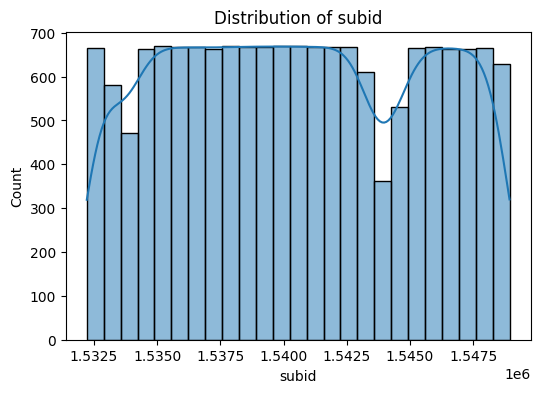

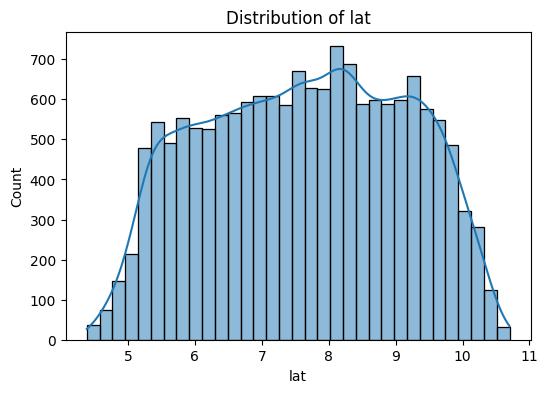

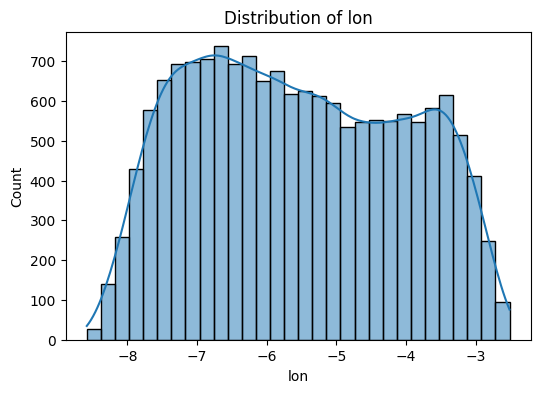

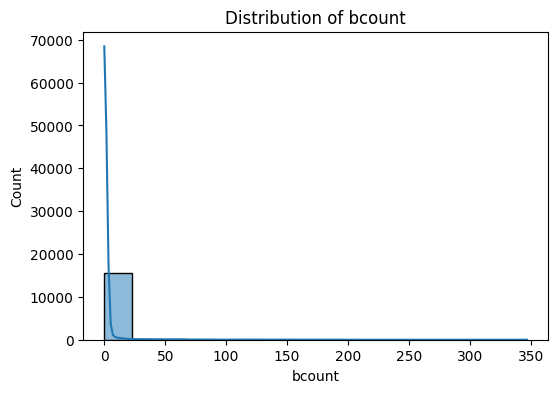

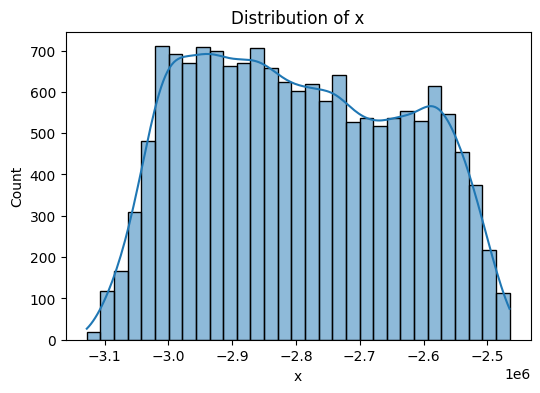

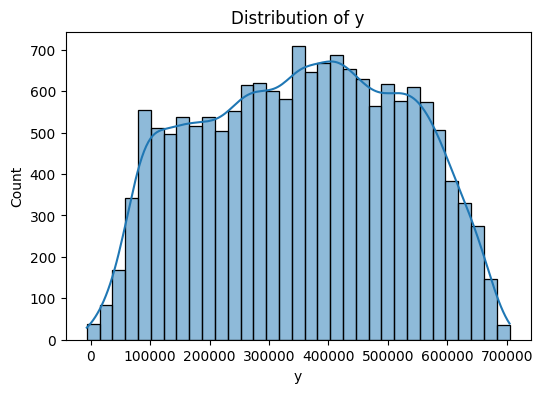

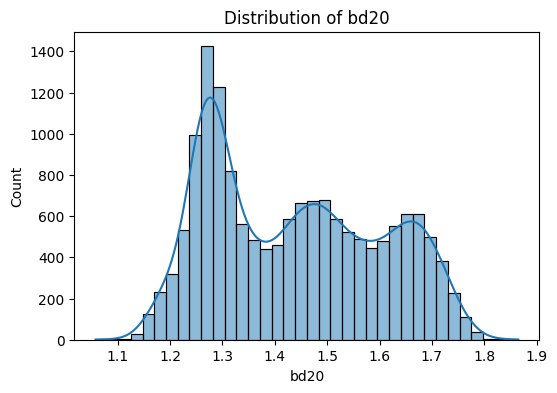

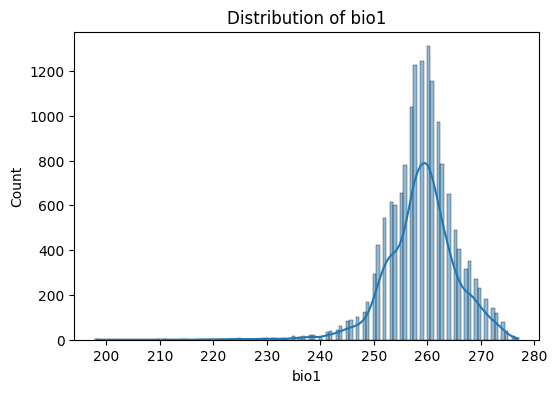

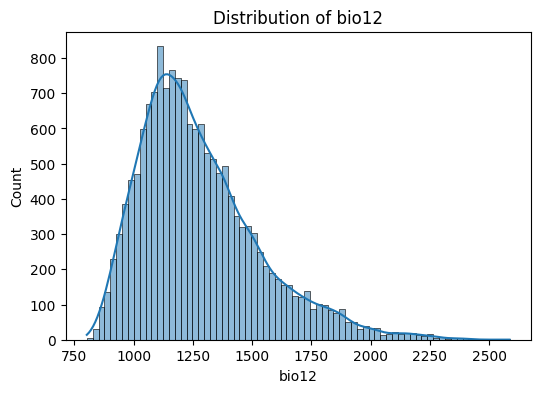

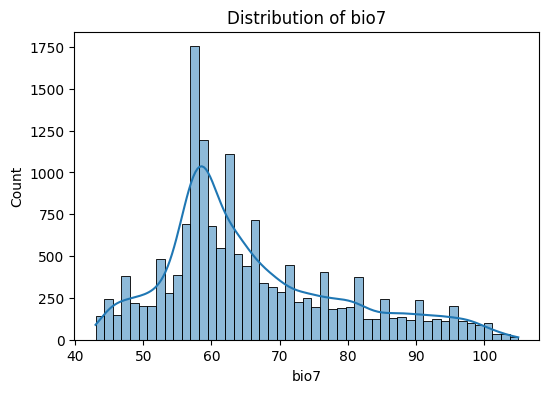

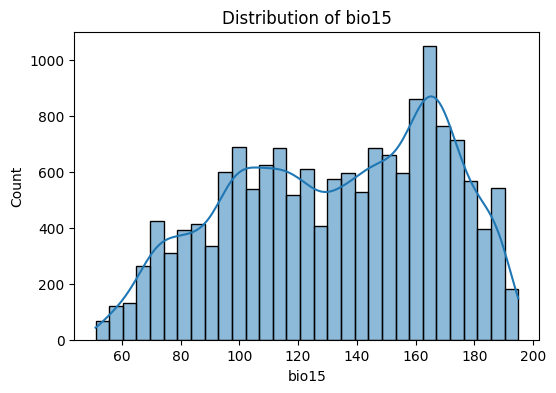

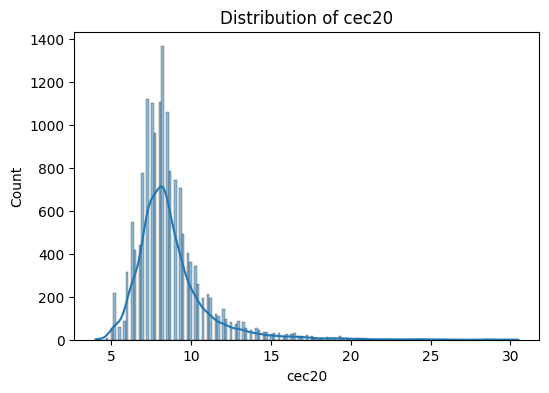

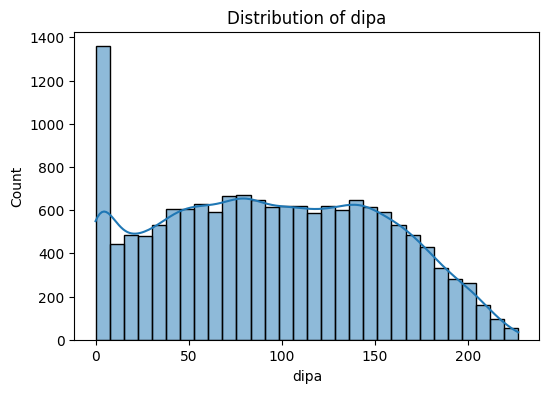

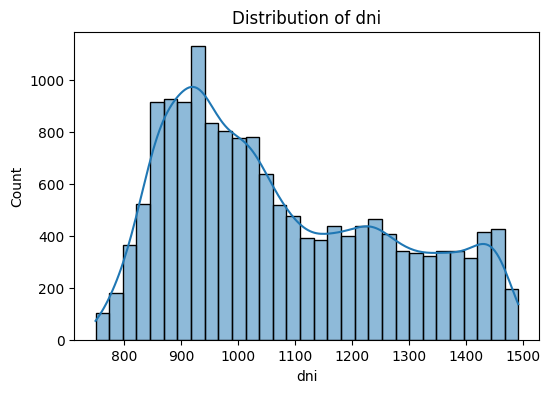

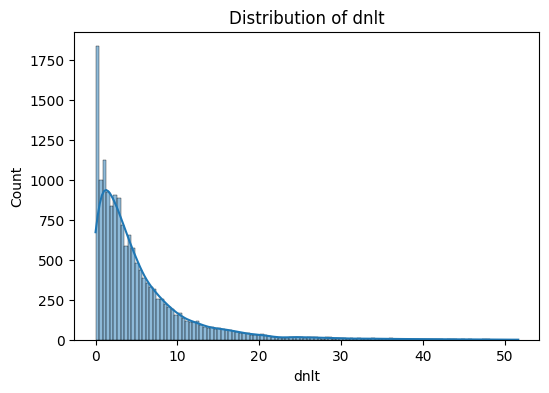

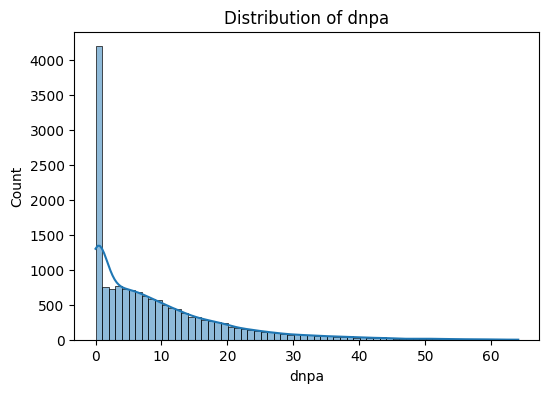

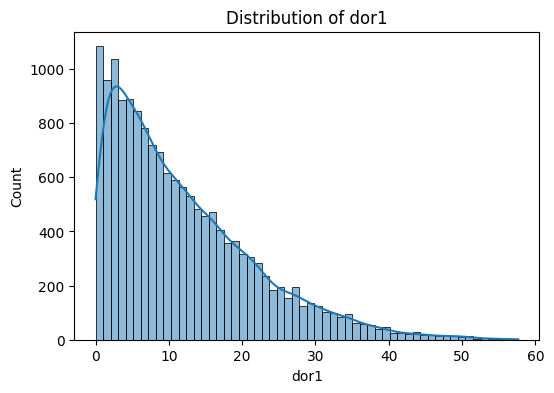

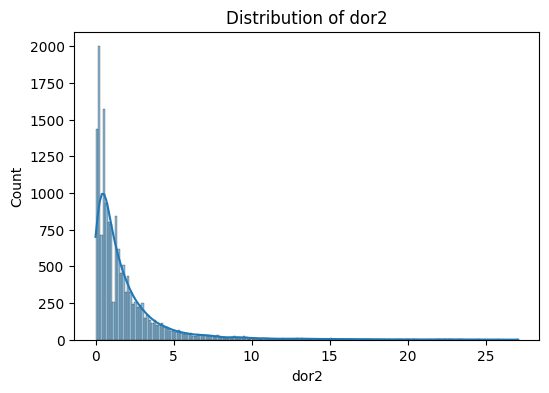

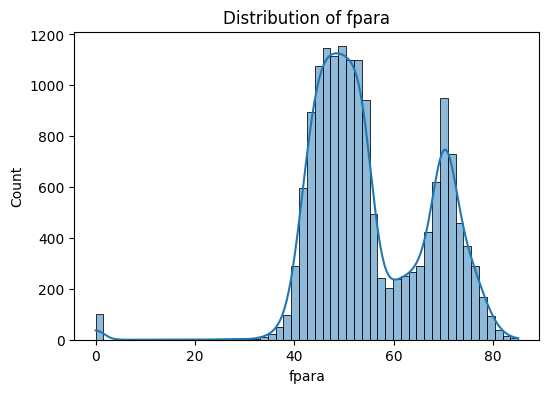

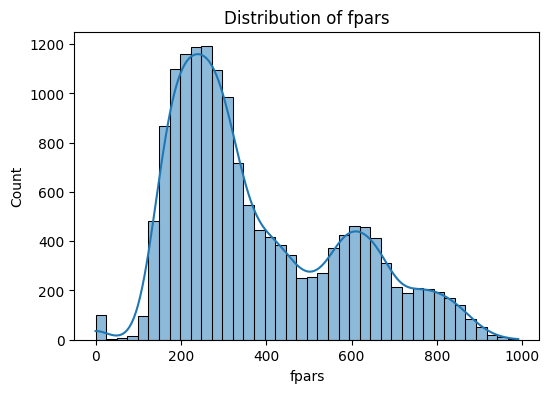

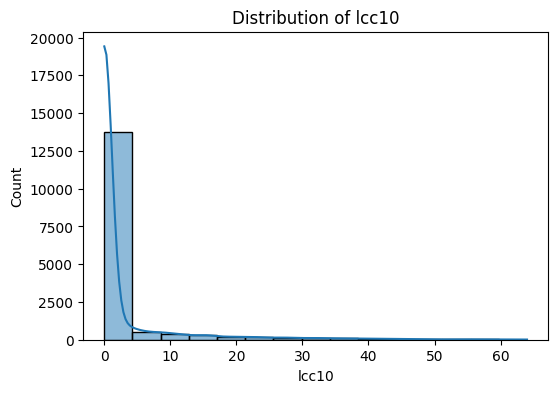

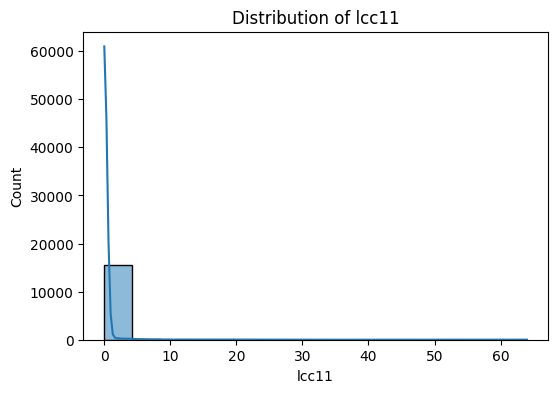

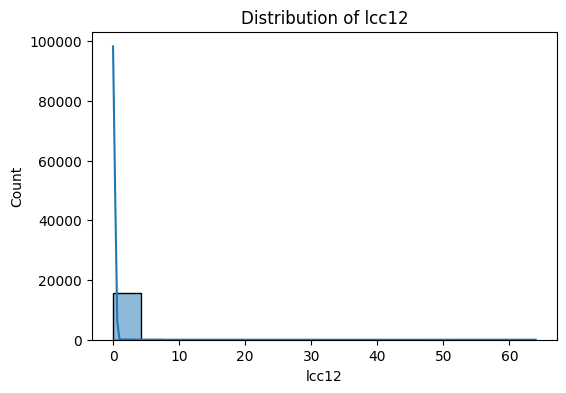

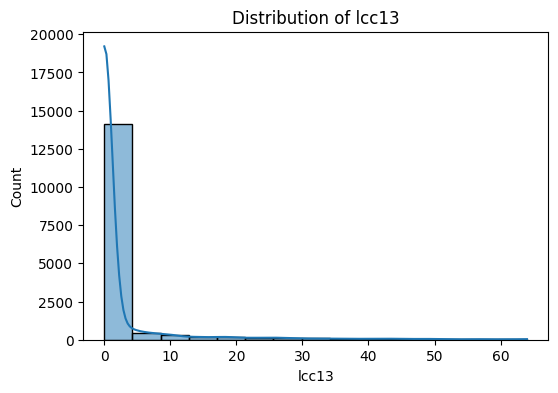

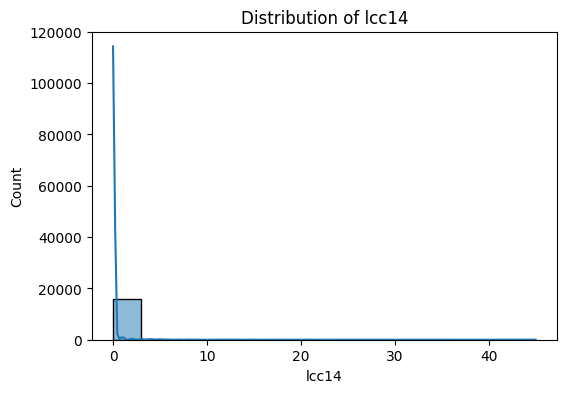

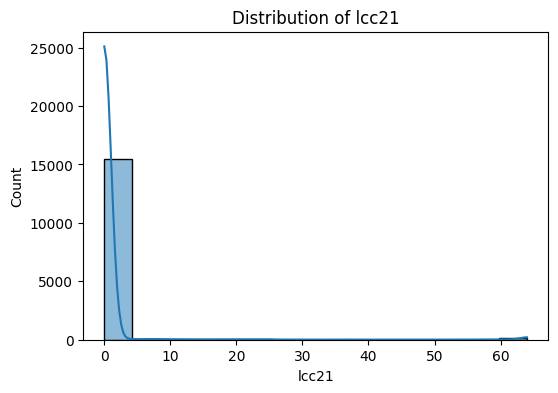

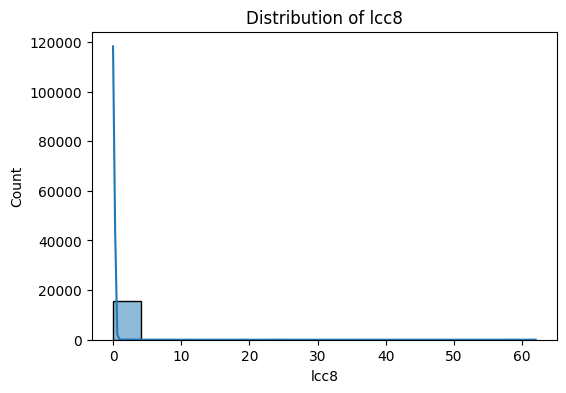

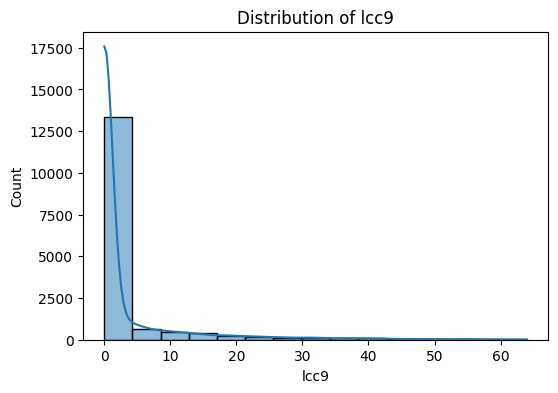

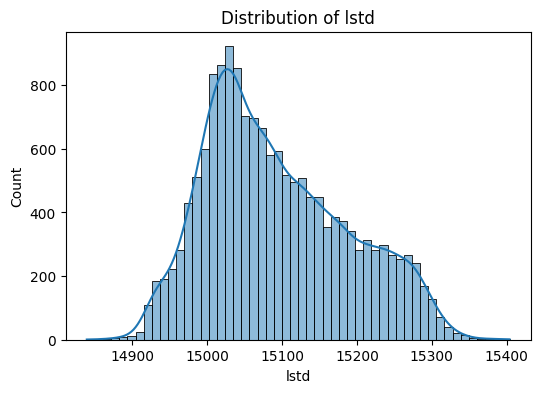

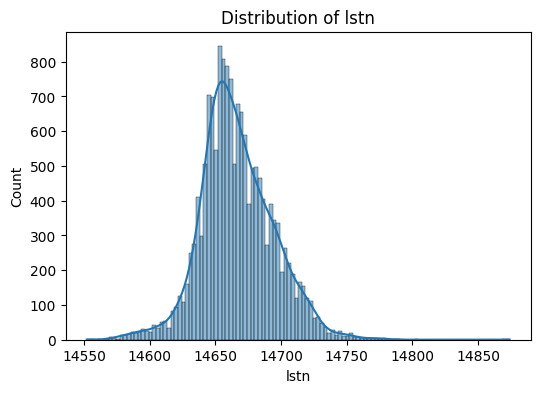

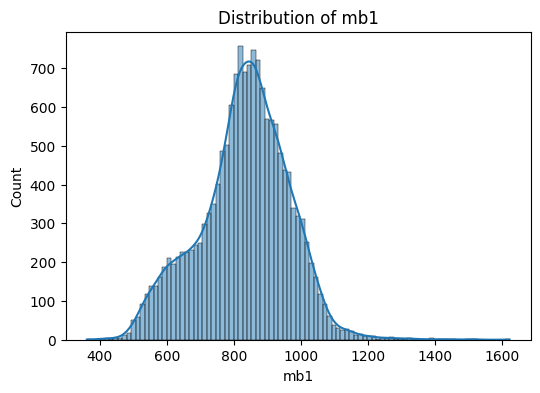

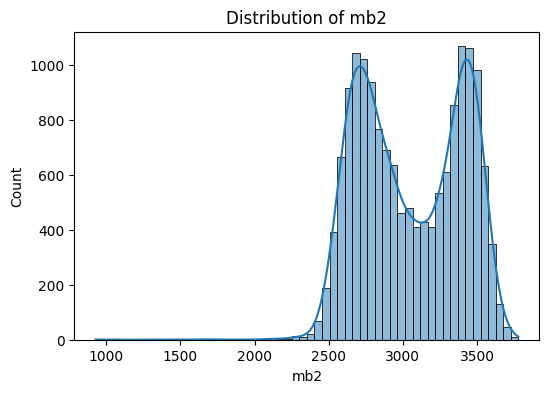

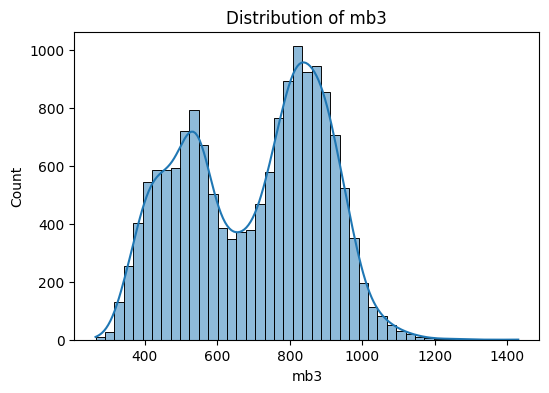

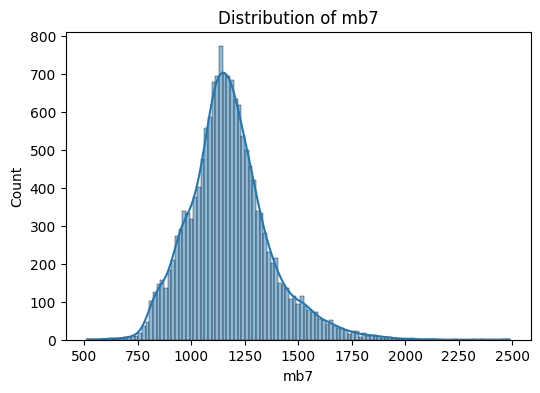

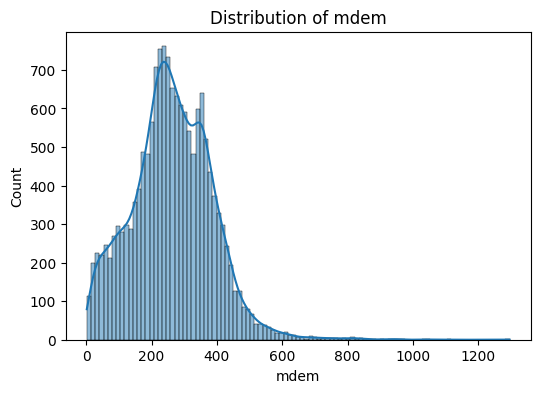

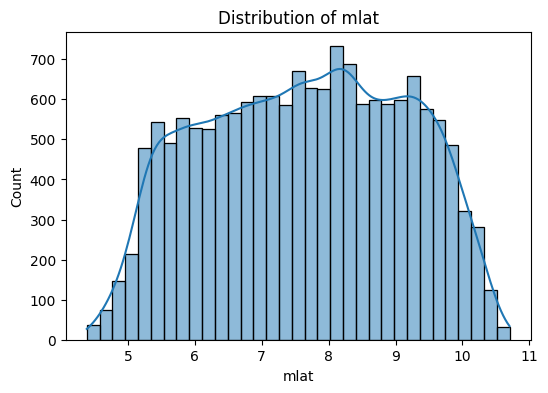

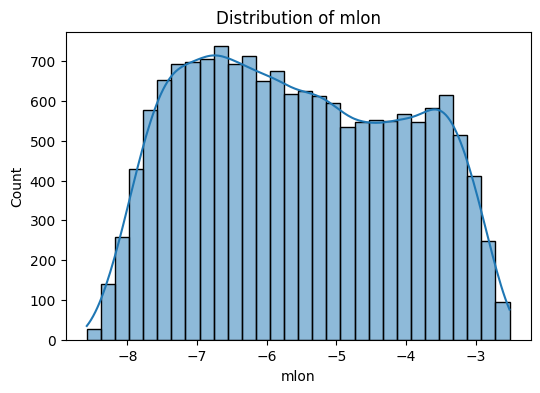

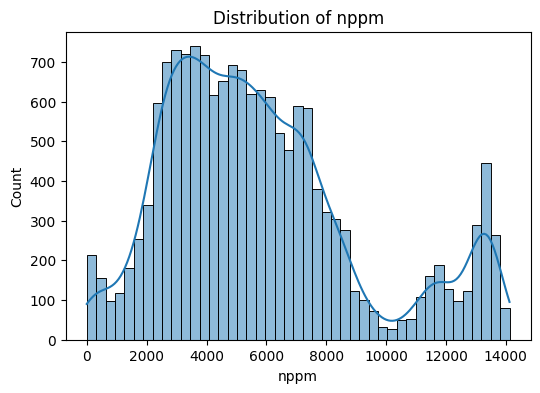

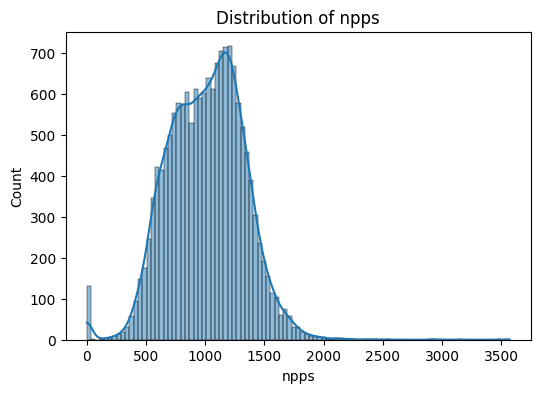

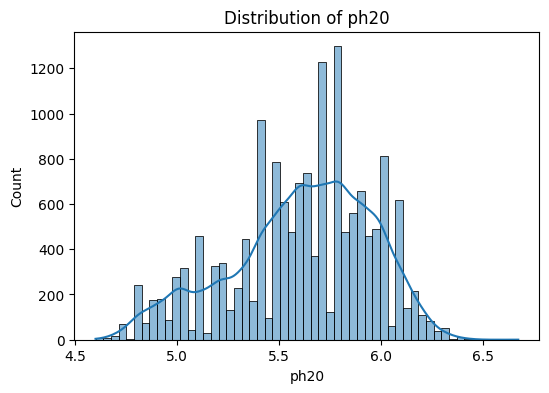

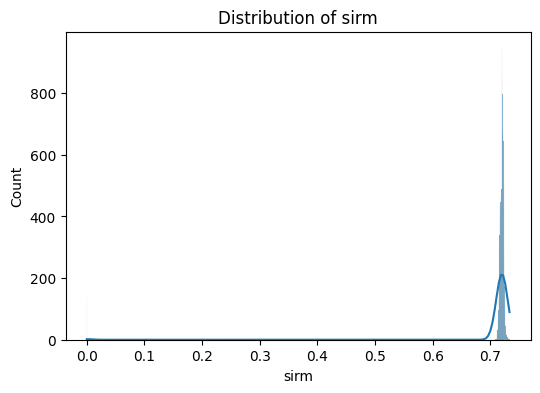

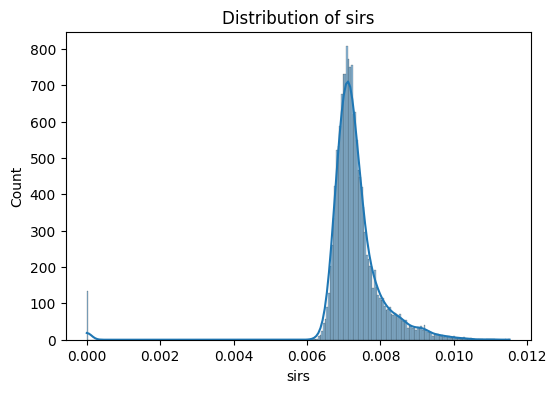

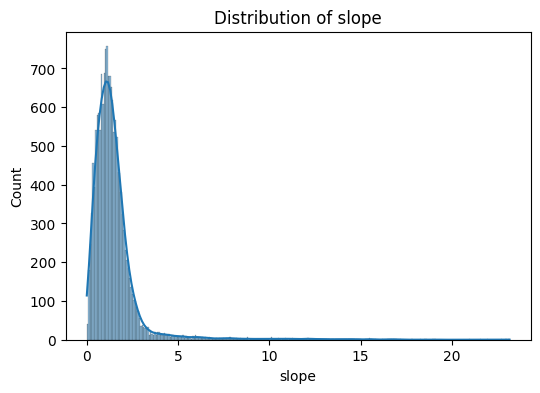

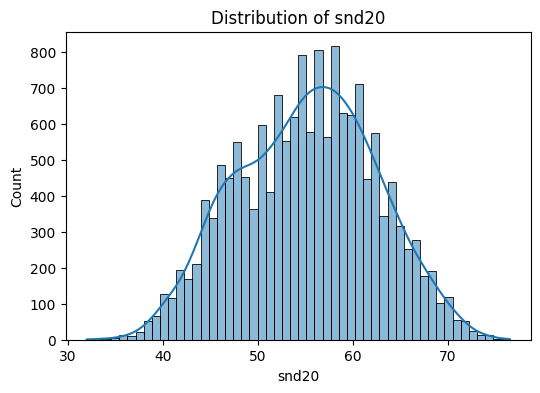

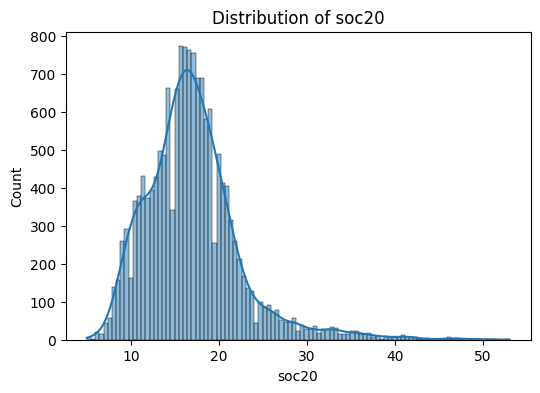

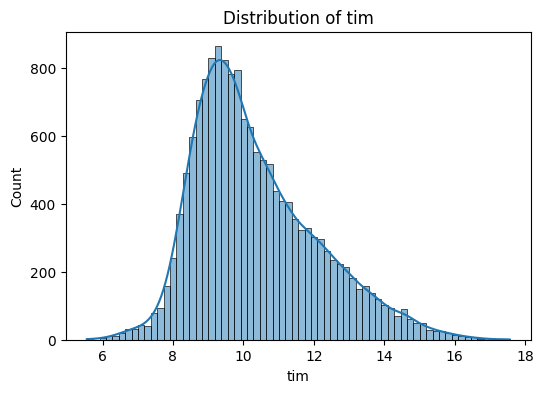

In [11]:
df_numeric = train_df.select_dtypes(include=[np.number])
for col in df_numeric.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_numeric[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

We identify the columns with missing values and instead of dropping them we perform imputation.

In [12]:
missing_cols = ['bd20', 'cec20', 'lstd', 'lstn', 'mb1', 'mb2', 'mb3', 'mb7', 'ph20', 'snd20', 'soc20', 'tim']
skewness = train_df[missing_cols].skew()
skewed_cols = skewness[abs(skewness) > 0.5].index
normal_cols = skewness[abs(skewness) <= 0.5].index

mean_imputer = SimpleImputer(strategy="mean")
median_imputer = SimpleImputer(strategy="median")

train_df[normal_cols] = mean_imputer.fit_transform(train_df[normal_cols])
train_df[skewed_cols] = median_imputer.fit_transform(train_df[skewed_cols])


Now that the numerical variables have been handled, the data has categorical variables which need to be converted into numerical features. These variables are also the target variables.

The building and cropland are binary while wcover has three outputs. However, we only need the wcover>60%. The code will ensure the <60% is grouped together.

In [13]:
train_df['building'] = train_df['building'].map({'No': 0, 'Yes': 1})
train_df['cropland'] = train_df['cropland'].map({'No': 0, 'Yes': 1})
train_df['wcover'] = train_df['wcover'].map({'<60%': 0, '>60%': 1})

In [14]:
train_df['land_cover'] = train_df[['building', 'cropland', 'wcover']].idxmax(axis=1)
train_df['land_cover'] = LabelEncoder().fit_transform(train_df['land_cover'])

## Distribution of Categorical Variables

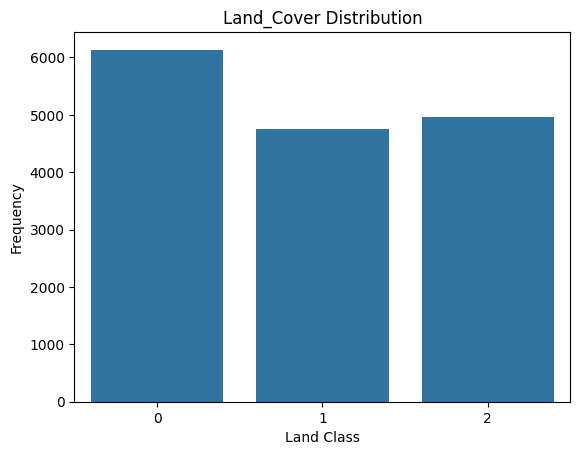

In [15]:
class_representation = {0: "Buildings", 1: "Cropland", 2: "Woody Vegetation >60%"}

ax = sns.countplot(x=train_df["land_cover"])
plt.title("Land_Cover Distribution")
plt.xlabel("Land Class")
plt.ylabel("Frequency")
plt.show()

The distribution shows there is no imbalance in the class distribution


# Feature Selection

Here we select features that are relevant to the task and drop the ones we do not need.

In [16]:
train_df.drop(columns=["subid", "lat", "lon", "bcount","building", "cropland", "wcover"], inplace=True)

The columns in the test dataset should be similar to the ones in the train dataset. Also bcount has no values in test dataset which is why we are dropping it in both datasets.

In [17]:
test_df.drop(columns=["lat","lon","bcount"], inplace=True)

# Modeling

## Split the Training Data

We split the data into a train and validation set before testing it on the unlabeled dataset.

In [18]:
X =train_df.drop(columns=["land_cover"])
y = train_df[["land_cover"]]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

The next step is standardizing the training data

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Modeling

## Model Training and Comparison

The next step is training the model using 3 different models and comparing them to obtain the best performing model.

In [20]:
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

best_model = None
best_log_loss = float("inf")
best_roc_auc = 0

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)

    y_val_pred = model.predict_proba(X_val)

    loss = log_loss(y_val, y_val_pred)
    roc_auc = roc_auc_score(y_val, y_val_pred, multi_class='ovr')
    print(f"{name} Log Loss: {loss}, ROC-AUC Score: {roc_auc:.4f}")

    if loss < best_log_loss:  #tracking the best model
        best_log_loss = loss
        best_roc_auc = roc_auc
        best_model = model

    y_val_pred_labels = model.predict(X_val)

    print(f"\n{name} Classification Report:")
    print(classification_report(y_val, y_val_pred_labels))

print(f"\nBest Model: {best_model} with Log Loss: {best_log_loss:.4f},ROC-AUC Score:{best_roc_auc:.4f} ")


Training RandomForest...
RandomForest Log Loss: 0.8362989134786847, ROC-AUC Score: 0.8000

RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.61      0.61      1241
           1       0.66      0.64      0.65       945
           2       0.62      0.64      0.63       986

    accuracy                           0.63      3172
   macro avg       0.63      0.63      0.63      3172
weighted avg       0.63      0.63      0.63      3172


Training LogisticRegression...
LogisticRegression Log Loss: 0.8670215943688107, ROC-AUC Score: 0.7768

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.58      0.58      1241
           1       0.62      0.59      0.61       945
           2       0.58      0.62      0.60       986

    accuracy                           0.59      3172
   macro avg       0.60      0.60      0.60      3172
weighted avg       

## Hyperparameter Tuning

Once we have identified the best performing model we do hyperparameter tuning. this step is intended to improve the model's performance.

In [21]:
if isinstance(best_model, RandomForestClassifier):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    grid_search = GridSearchCV(best_model, param_grid, cv=3, scoring='neg_log_loss', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print("Best Parameters from GridSearch:", grid_search.best_params_)

Best Parameters from GridSearch: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


We train the best performing model using the best parameters obtained

In [22]:
best_model = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_split=2, min_samples_leaf=2, random_state=42)
best_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=300, random_state=42)

## Model Evaluation on Validation Set

Evaluating the model on the validation set ensures the model is performing well before testing on unseen data.

In [23]:
y_val_pred = best_model.predict_proba(X_val)
print("Validation Log Loss:", log_loss(y_val, y_val_pred))
print("ROC-AUC Score:", roc_auc_score(y_val, best_model.predict_proba(X_val), multi_class='ovr'))
print("Classification Report:")
print(classification_report(y_val, best_model.predict(X_val)))

Validation Log Loss: 0.8304123237126766
ROC-AUC Score: 0.80426990375254
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.62      0.62      1241
           1       0.65      0.65      0.65       945
           2       0.63      0.64      0.64       986

    accuracy                           0.64      3172
   macro avg       0.64      0.64      0.64      3172
weighted avg       0.64      0.64      0.64      3172



The next step is to make predictions on the test dataset which had unlabeled columns

In [24]:
X_test = test_df.drop(columns=['subid'])
X_test = scaler.transform(X_test)
y_test_pred = best_model.predict_proba(X_test)

## Format and save the submission

In [25]:
submission_df = pd.DataFrame({'subid': test_df['subid']})
submission_df[['buildings_prob', 'cropland_prob', 'wcover_prob']] = y_test_pred

submission_df.to_csv("submission.csv", index=False)
print("Submission file saved.")

Submission file saved.
